# Parking Lot Classification Project

This project is designed to classify parking lot images into two categories: **empty** and **not empty**. The project was created using **Google Colab**, which provides a cloud-based environment for running Python code. To run this notebook successfully, you need to:

1. **Change the Project Path**: Update the `project_path` and `dataset_path` variable to match the location of your project folder in your Google Drive or local system.

2. **Read the README File**: Refer to the `README` file included in the project for detailed information about the dataset and instructions on how to access it.

By following these steps, you can replicate the results and explore the dataset effectively.

In [1]:
# ------------------------------
# Standard Library
# ------------------------------
import os
import random

# ------------------------------
# Data Analysis Libraries
# ------------------------------
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as font_manager

# ------------------------------
# Image and Visualization Libraries
# ------------------------------
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# Project path
project_path = '/content/drive/MyDrive/parkinglot_project'

In [ ]:
# Dataset path
dataset_path = os.path.join(project_path, 'dataset/clf-data')

In [ ]:
# Datasets paths
empty_path = os.path.join(dataset_path, 'empty')
not_empty_path = os.path.join(dataset_path, 'not_empty')

In [3]:
# ==============================
# Directory Setup
# ==============================

# Define the directory name for saving images

OUTPUT_DIR = os.path.join(project_path, 'images')

# Check if the directory exists, if not, create it
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# ==============================
# Plot Styling & Customization
# ==============================

# Set a Minimalist Style
sns.set_style("whitegrid")

# Customize Matplotlib settings for a modern look
mpl.rcParams.update({
    'axes.edgecolor': 'grey',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black'
})

# ==============================
# Font Configuration
# ==============================

# Path to the custom font file
FONT_PATH = os.path.join(project_path, 'fonts/Montserrat-Regular.ttf')

# Add the font to matplotlib's font manager
font_manager.fontManager.addfont(FONT_PATH)

# Set the font family to Montserrat
plt.rcParams['font.family'] = 'Montserrat'

In [16]:
def show_random_image_grid(folder_path, grid_title=""):
    """
    Displays a grid of random images from a specified folder.

    This function reads images from the given folder path, randomly selects
    up to 9 images, and displays them in a 3x3 grid. Supported image
    formats include PNG, JPG, JPEG, WEBP, BMP, and GIF.

    Parameters:
        -folder_path (str): The path to the folder containing the images.
        -grid_title (str, optional): The title to display above the image grid.

    Returns:
        None (displays the image grid using matplotlib).
    """

    # Get list of image files from the folder
    image_files = [f for f in os.listdir(folder_path)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp',
                                          '.bmp', '.gif'))]

    # Choose 9 random images
    selected_images = random.sample(image_files, min(9, len(image_files)))

    # Set up the figure
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle(grid_title, fontsize=16)

    # Plot each image
    for ax, img_file in zip(axes.flatten(), selected_images):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        img_array = np.array(img)
        ax.imshow(img_array)
        #ax.axis('off')
        ax.set_xlabel("Width")
        ax.set_ylabel("Height")

    # Hide any unused subplots
    for ax in axes.flatten()[len(selected_images):]:
        ax.axis('off')

    plt.savefig(os.path.join(OUTPUT_DIR, f"random_sample_{os.path.basename(os.path.normpath(folder_path))}_parkings.png"),
                bbox_inches='tight',
                facecolor='none',
                transparent=True)

    plt.tight_layout()
    plt.show()

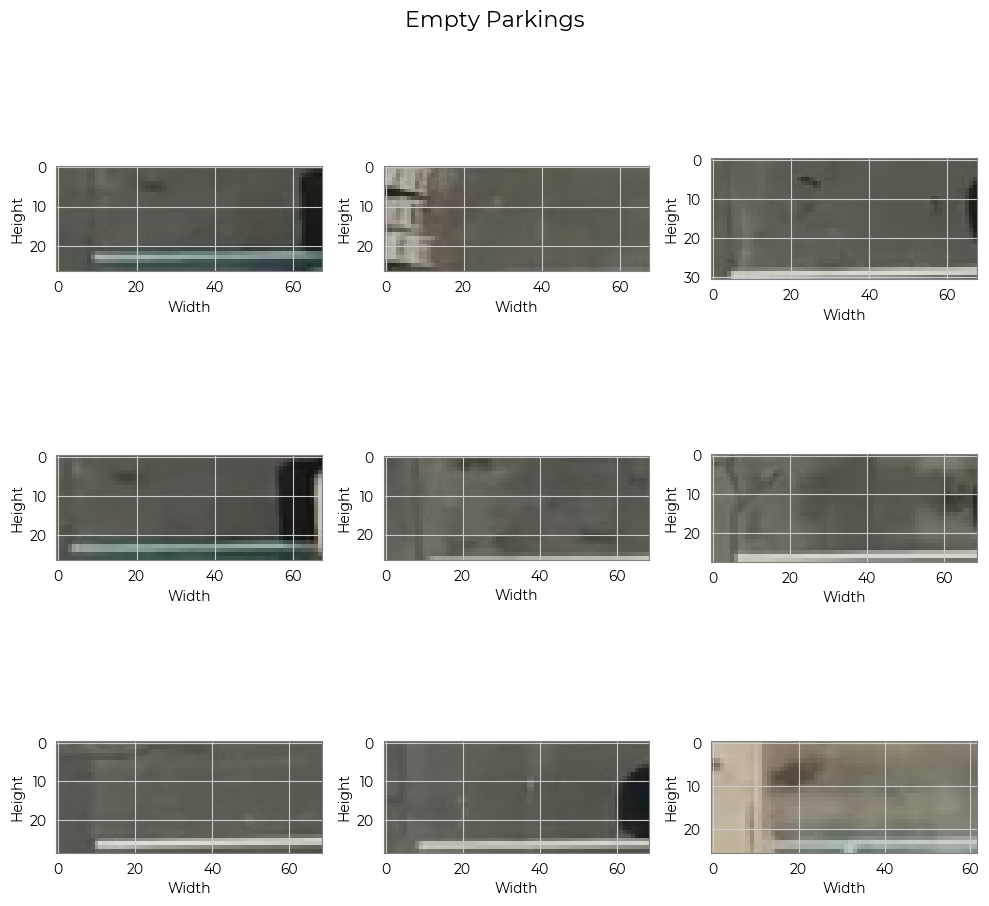

In [17]:
# Plot the images for empty parkings in google drive
show_random_image_grid(empty_path, grid_title="Empty Parkings")

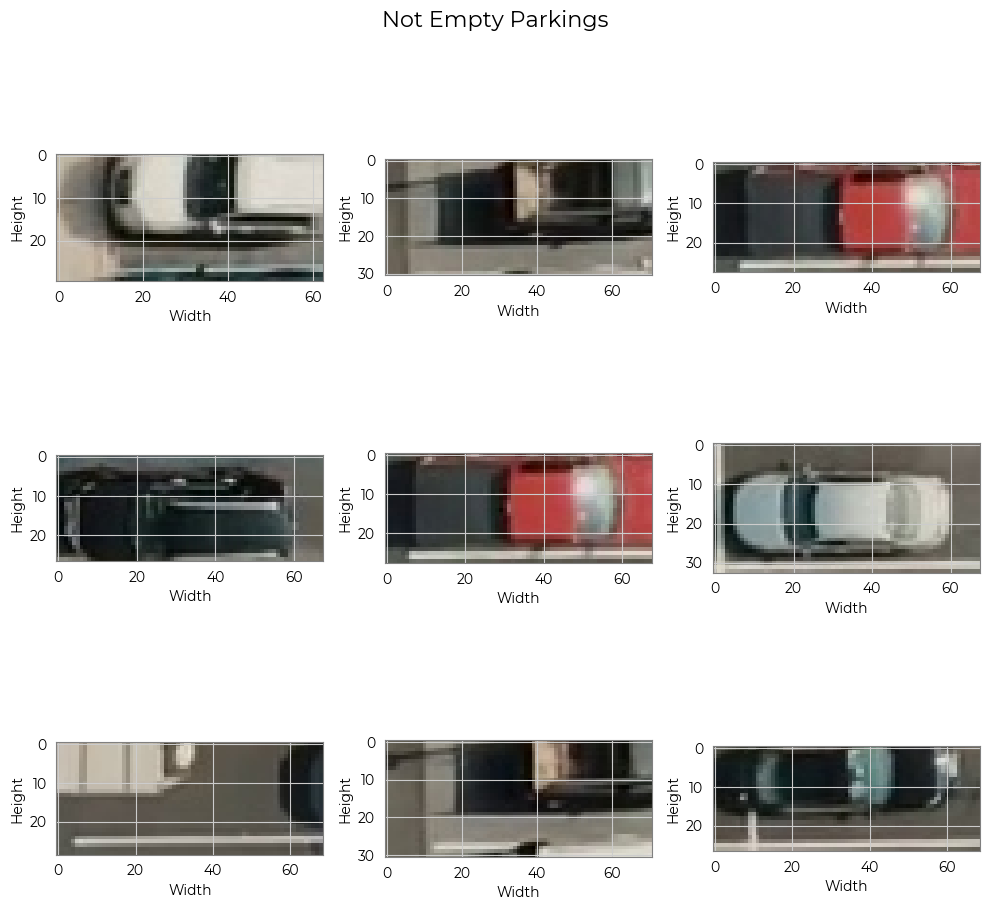

In [18]:
# Plot the images for not empty parking
show_random_image_grid(not_empty_path, grid_title="Not Empty Parkings")